In [147]:
"""
@Author: Venkatarao Rebba
@ASU ID: 1222480025
"""

'\n@Author: Venkatarao Rebba\n@ASU ID: 1222480025\n'

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns 
from statsmodels.graphics.mosaicplot import mosaic


In [149]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [150]:
data = pd.read_csv("adult.data", header=None, names=col_names )
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


***
1: Stacked Bar-Chart # Occupation 
***

In [151]:
# count occurences of features for given income labels for plotting statistics
cols = list(data.columns)
cols.remove("income")
cols.remove("fnlwgt")
custom_df = {}
custom_df['occupation'] = data['occupation']
custom_df['income'] = data['income']
custom_df = pd.DataFrame(data=custom_df)
custom_df

,occupation,income
0,Adm-clerical,<=50K
1,Exec-managerial,<=50K
2,Handlers-cleaners,<=50K
3,Handlers-cleaners,<=50K
4,Prof-specialty,<=50K
...,...,...
32556,Tech-support,<=50K
32557,Machine-op-inspct,>50K
32558,Adm-clerical,<=50K
32559,Adm-clerical,<=50K


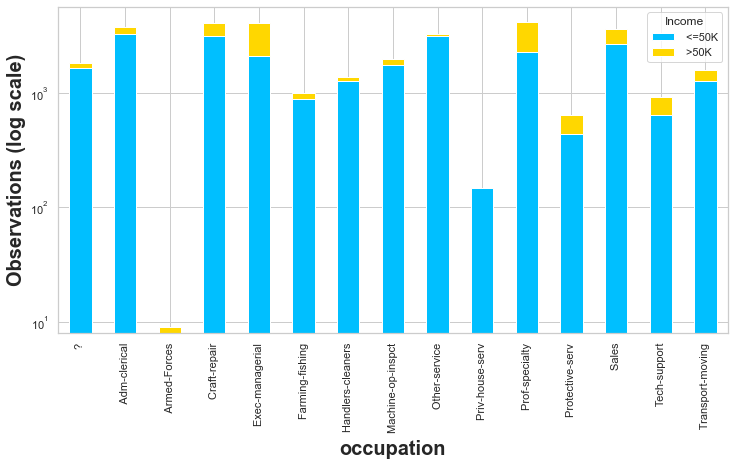

In [152]:
col = 'occupation'
stats = custom_df.groupby([col, "income"])["income"].count().unstack()
ax = stats.plot(kind="bar", color=["deepskyblue", "gold"], stacked=True, log=True, figsize=(12,6))
ax.set_xlabel("occupation", fontsize=20, fontweight="bold")
ax.set_ylabel("Observations (log scale)", fontsize=20, fontweight="bold")
ax.get_legend().set_title("Income")

***
Story 2: Age, Hours-per-week, Income
Story#3: Education Num, Capital Gain

 
***

/var/folders/yl/x2md9y_16vddzrtdtnt3cl700000gq/T/ipykernel_47897/1968988622.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("adult.data", sep=", ", header=None, names=col_names )


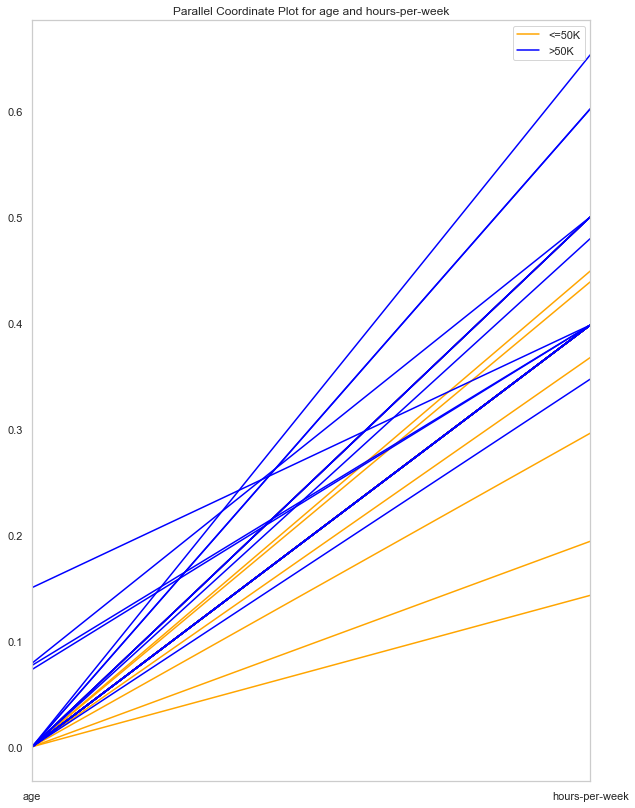

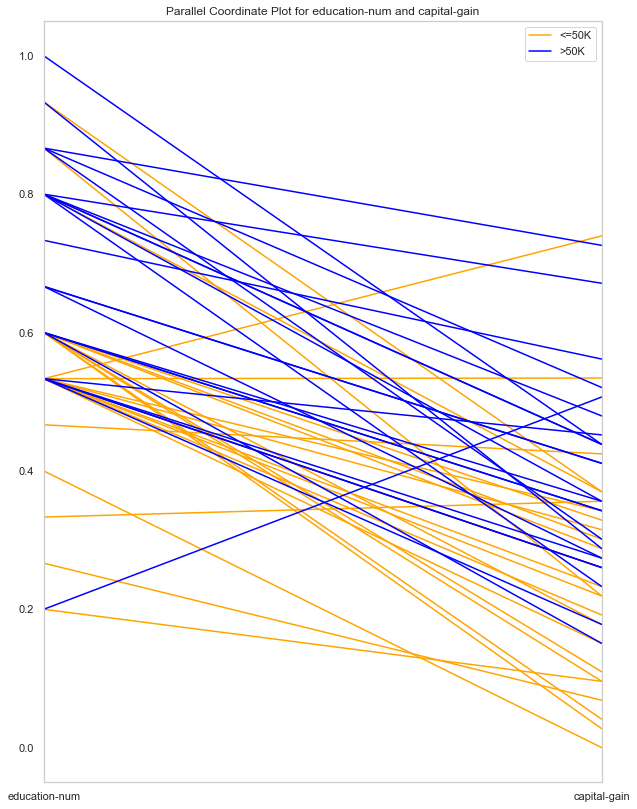

In [153]:
data = pd.read_csv("adult.data", sep=", ", header=None, names=col_names )

# Categorizing as less than 50K salary as threshold.
lessThan50K = data[data["income"] == "<=50K"].sample(n=7841)

# Categorizing greater than 50K salary as threshold.
greaterThan50K = data[data["income"] == ">50K"]

# Combining both dataframes.
data = pd.concat([greaterThan50K, lessThan50K])

# Creating a new column.
data['label'] = (data["income"] == ">50K") * 1

# Getting the copy of the dataframe.
df = data[['hours-per-week', 'education-num', 'age', 'capital-gain', 'label']].copy()

# Normalizing.
normalizedDataframe = MinMaxScaler().fit_transform(df.values)
dataframe = pd.DataFrame(normalizedDataframe)
data.index = dataframe.index
dataframe['income'] = data['income']
dataframe.columns = ['hours-per-week','education-num', 'capital-gain', 'age', 'label', 'income']

# Segregating the columns into two classes based on salary.
lessThan50KDf = dataframe[dataframe["label"] == 0.0].sample(n = 25)
greaterThan50KDf = dataframe[dataframe["label"] == 1.0].sample(n = 25)

# Concatenating the dataframes.
dataframe = pd.concat([lessThan50KDf, greaterThan50KDf])

# Plotting the parallel coordinate plot.
pd.plotting.parallel_coordinates(dataframe, 'income', cols = ['age', 'hours-per-week'], color = ['orange', 'blue'])

# Title for the plot.
plt.title('Parallel Coordinate Plot for age and hours-per-week')

# Displaying the plot.
plt.show()

plt.close()

pd.plotting.parallel_coordinates(dataframe, 'income', cols = ['education-num', 'capital-gain'], color = ['orange', 'blue'])

# Title for the plot.
plt.title('Parallel Coordinate Plot for education-num and capital-gain')

# Displaying the plot.
plt.show()

plt.close()


In [154]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
label             0
dtype: int64

Step#4: Sex, Race, Income

(<Figure size 720x1008 with 3 Axes>,
 {('Male', 'White', '>50K'): (0.0,
   0.0,
   0.40359653103854504,
   0.7908694876824701),
  ('Male', 'White', '<=50K'): (0.4188386503545679,
   0.0,
   0.28229883818248697,
   0.7908694876824701),
  ('Male', 'Black', '>50K'): (0.0,
   0.8202812523883525,
   0.29101560665520926,
   0.05349909561052658),
  ('Male', 'Black', '<=50K'): (0.3062577259712322,
   0.8202812523883525,
   0.3948797625658227,
   0.05349909561052658),
  ('Male', 'Asian-Pac-Islander', '>50K'): (0.0,
   0.9031921127047615,
   0.42616965607600116,
   0.02866022979135352),
  ('Male', 'Asian-Pac-Islander', '<=50K'): (0.44141177539202414,
   0.9031921127047615,
   0.2597257131450308,
   0.02866022979135352),
  ('Male', 'Other', '>50K'): (0.0,
   0.9612641072019974,
   0.23694567300362923,
   0.0042035003693985384),
  ('Male', 'Other', '<=50K'): (0.25218779231965216,
   0.9612641072019974,
   0.44894969621740277,
   0.0042035003693985384),
  ('Male', 'Amer-Indian-Eskimo', '>50K'): (0.

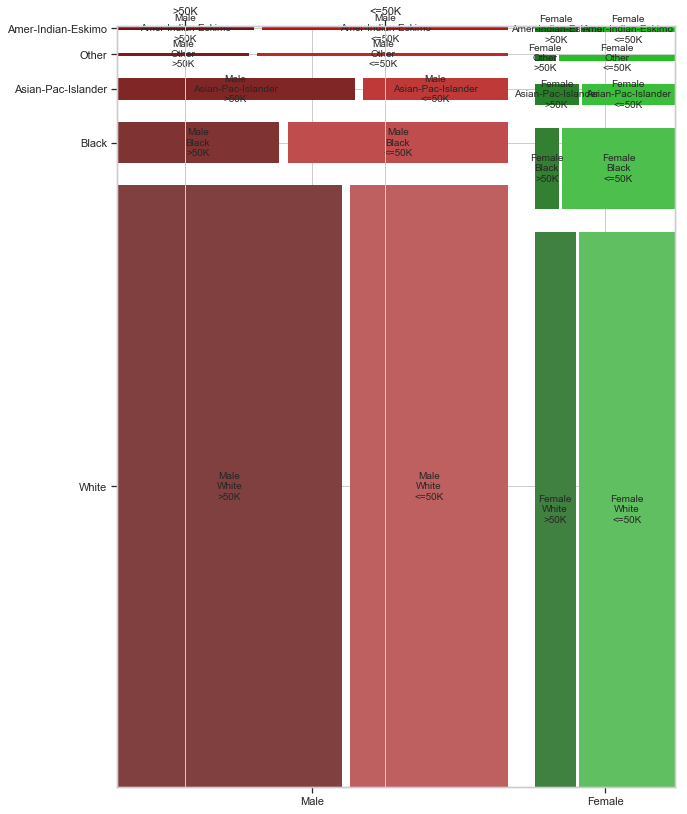

In [146]:
plt.rcParams["figure.figsize"]=(10, 14)
plt.rcParams['font.size'] = 12.0
mosaic(data, ['sex', 'race','income'], gap=0.05)